In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Importamos el dataset
gfi = pd.read_csv(r'C:\Users\wdi_w\Desktop\W\UTN\Poster\micro_world.csv')
quest = pd.read_csv(r'C:\Users\wdi_w\Desktop\W\UTN\Poster\Cuestionario.csv', delimiter=";")

print(f'Shape: {np.shape(gfi)}')


Shape: (154923, 105)


In [4]:
#Un vistazo al dataset
gfi.head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
0,Afghanistan,AFG,South Asia,19456060.0,139880545,1.936754,1,18.0,2.0,1,...,4,4,4,2.0,2,5.0,0.0,NaN,0.0,NaN
1,Afghanistan,AFG,South Asia,19456060.0,111705622,0.332867,2,25.0,1.0,5,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
2,Afghanistan,AFG,South Asia,19456060.0,128866217,1.338906,2,40.0,1.0,2,...,4,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN
3,Afghanistan,AFG,South Asia,19456060.0,138171768,0.275619,2,45.0,1.0,1,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN
4,Afghanistan,AFG,South Asia,19456060.0,125156190,0.629304,1,30.0,1.0,4,...,4,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN


In [ ]:
questd= dict(zip(quest.id,quest.Variable))
print(questd)

In [30]:
#Las columnas
gfi.columns

Index(['economy', 'economycode', 'regionwb', 'pop_adult', 'wpid_random', 'wgt',
       'female', 'age', 'educ', 'inc_q',
       ...
       'receive_wages', 'receive_transfers', 'receive_pension',
       'receive_agriculture', 'pay_utilities', 'remittances', 'pay_onlne',
       'pay_onlne_mobintbuy', 'pay_cash', 'pay_cash_mobintbuy'],
      dtype='object', length=105)

In [22]:
#Quitamos los duplicados
gfi.drop_duplicates(inplace=True, keep='first')
print(f'Shape: {np.shape(gfi)}')

Shape: (154923, 105)


In [23]:
#Analizamos la cantidad de nulos
total = gfi.isnull().sum().sort_values(ascending=False)
porcentaje = (gfi.isnull().sum()/gfi.isnull().count()).sort_values(ascending=False)
data_faltante = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
data_faltante.head(30)

,Total,Porcentaje
fin45,153690,0.992041
fin41,152786,0.986206
fin44,151932,0.980694
fin40,150280,0.970030
fin47c5,148295,0.957217
fin47c3,148295,0.957217
fin47c4,148295,0.957217
fin27c1,146199,0.943688
fin27c2,146199,0.943688
fin47c1,145241,0.937504


In [24]:
gfif = gfi.drop((data_faltante[data_faltante['Porcentaje'] > 0.15]).index,1) # eliminamos las columnas 


In [25]:
gfif=gfif.dropna() # eliminamos el registro
gfif.isnull().sum().max() #chequeamos que no haya otro valor nulo haciendo el maximo de la suma de cada columna

0

In [29]:
total2 = gfif.isnull().sum().sort_values(ascending=False)
porcentaje2 = (gfif.isnull().sum()/gfif.isnull().count()).sort_values(ascending=False)
data_faltante2 = pd.concat([total2, porcentaje2], axis=1, keys=['Total', 'Porcentaje'])
data_faltante2.head(30)


,Total,Porcentaje
pay_utilities,0,0.0
fin17a,0,0.0
fin15,0,0.0
fin14b,0,0.0
fin14a,0,0.0
fin7,0,0.0
fin2,0,0.0
emp_in,0,0.0
inc_q,0,0.0
educ,0,0.0


In [28]:
print(f'Shape: {np.shape(gfif)}')

Shape: (152464, 37)


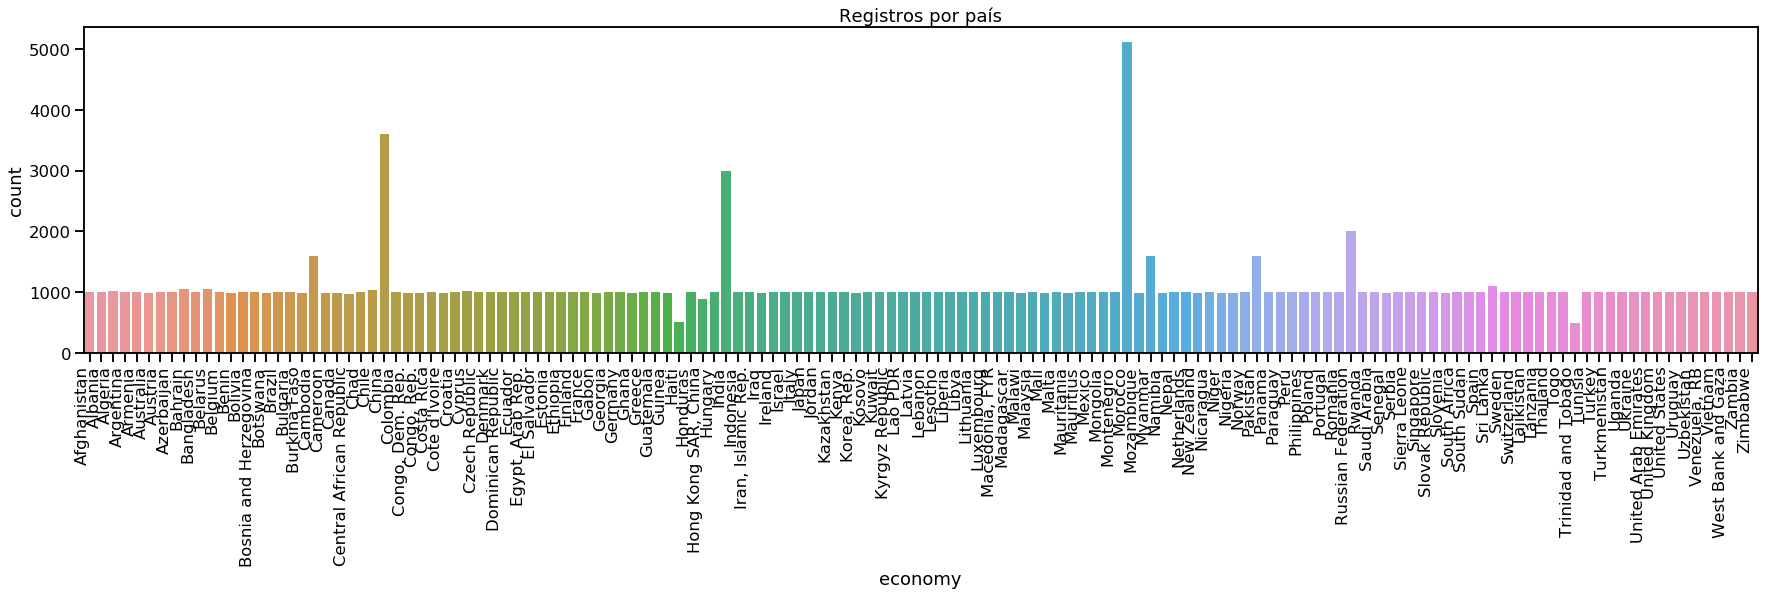

In [33]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "LINEA"
sns.set_context("talk")
plt.figure(figsize=(30,6))
ax=sns.countplot(x="economy", data=gfif)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title("Registros por país")
plt.show()